In [1]:
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
sns.set(rc={'figure.figsize':(11,6)})

In [5]:
events_data = pd.read_csv('event_data_train.csv')
events_data.shape

(3480703, 4)

In [6]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [43]:
submissions_data = pd.read_csv('submissions_data_train.csv')
submissions_data.iloc[:2]

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853


In [44]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.day

In [8]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [11]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [14]:
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


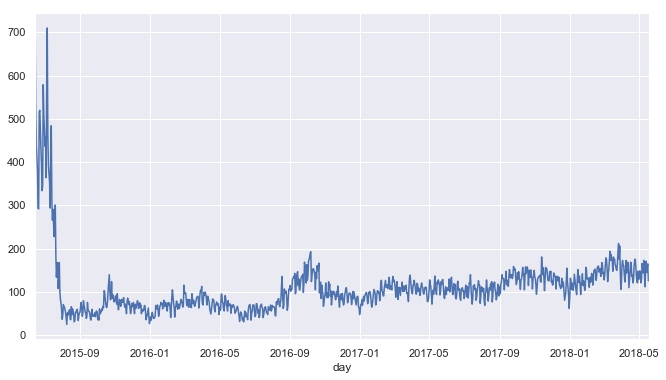

In [17]:
events_data.groupby('day').user_id.nunique().plot()

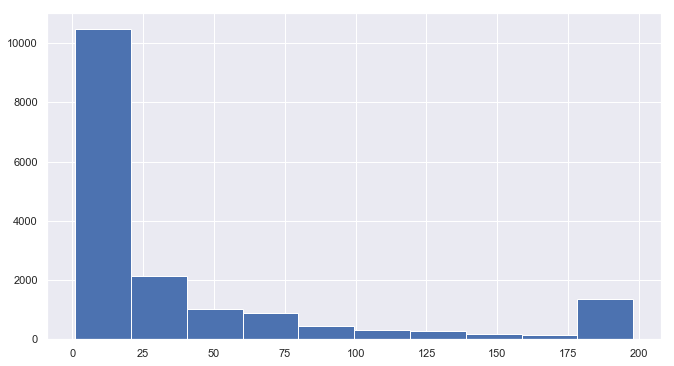

In [23]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False)\
        .agg({'step_id':'count'})\
        .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [29]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [31]:
events_data.pivot_table(index='user_id', columns='action',
                       values='step_id', aggfunc='count',
                       fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


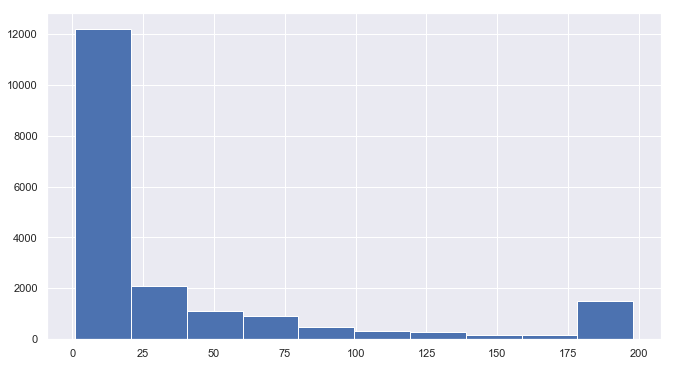

In [34]:
events_data[events_data['action'] == 'discovered'].groupby('user_id', as_index=False)\
            .agg({'step_id':'count'}).rename(columns={'step_id':'discover'}).discover.hist()

In [95]:
users_events_data = events_data.pivot_table(index='user_id', columns='action',
                       values='step_id', aggfunc='count',
                       fill_value=0).reset_index()

In [36]:
events_data.iloc[:2]

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15


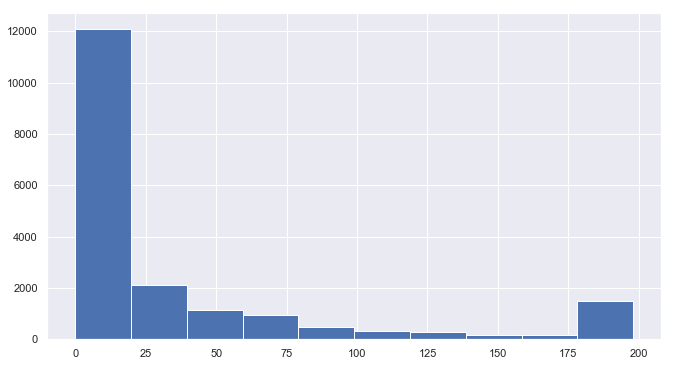

In [41]:
events_data.pivot_table(index='user_id', columns='action',
                       values='step_id', aggfunc='count',
                        fill_value=0).reset_index().discovered.hist()



In [45]:
submissions_data.iloc[:2]

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,15


In [53]:
user_score = submissions_data.pivot_table(index='user_id', columns='submission_status',
                             aggfunc='count', values='step_id',
                             fill_value=0).reset_index().head()

In [54]:
user_score.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [56]:
events_data.iloc[:2]

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15


In [70]:
gap_date = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
        .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

In [71]:
gap_date = pd.Series(np.concatenate(gap_date, axis=0))

In [73]:
gap_date = gap_date/ (24 * 60 *60)

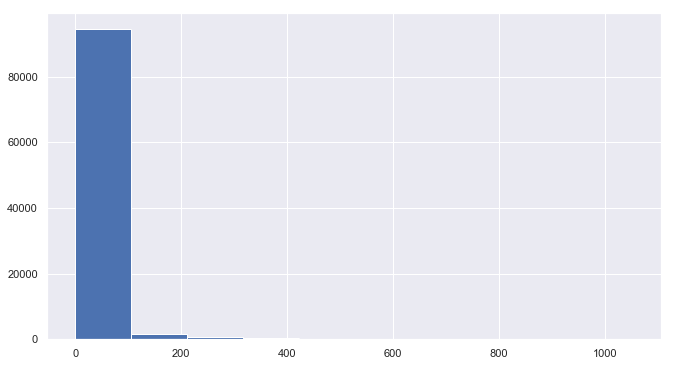

In [74]:
gap_date.hist()

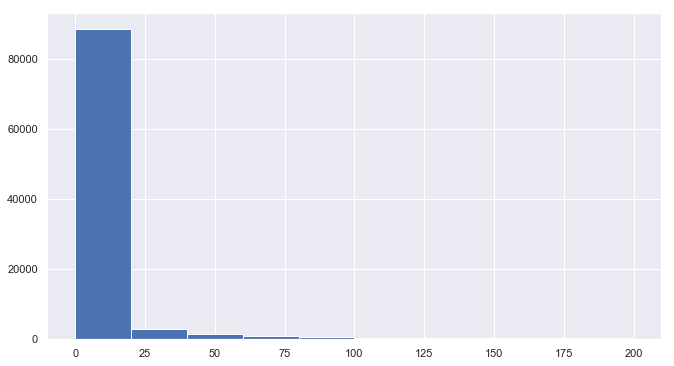

In [76]:
gap_date[gap_date < 200].hist()

In [78]:
gap_date.quantile(0.95)

59.760440972222156

In [79]:
gap_date.quantile(0.90)

18.325995370370403

In [80]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [81]:
now = 1526772811
drop_out_threshold = 30 * 24 * 60 * 60

In [82]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp':'max'})\
    .rename(columns={'timestamp':'last_timestamp'})

In [84]:
users_data['is_goner'] = (now - users_data.last_timestamp) > drop_out_threshold

In [85]:
users_data.head()

,user_id,last_timestamp,is_goner
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [87]:
user_score.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [88]:
users_data.merge(user_score).head()

,user_id,last_timestamp,is_goner,correct,wrong
0,2,1519226966,True,2,0
1,3,1444581588,True,29,23
2,5,1499859939,True,2,2
3,8,1481466913,True,9,21
4,14,1436368676,True,0,1


In [89]:
users_data.merge(user_score, how='outer').head()

,user_id,last_timestamp,is_goner,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [90]:
users_data = users_data.merge(user_score, on='user_id', how='outer')

In [92]:
users_data.head()

,user_id,last_timestamp,is_goner,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [93]:
users_data = users_data.fillna(0)

In [94]:
users_data.iloc[:5]

,user_id,last_timestamp,is_goner,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [97]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [98]:
users_data = users_data.merge(users_events_data, how='outer')

In [99]:
users_data.head()

,user_id,last_timestamp,is_goner,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [105]:
users_days = events_data.groupby('user_id').day.nunique()

In [106]:
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [107]:
users_days = users_days.to_frame()
users_days.head()

,day
user_id,
1,1
2,2
3,7
5,2
7,1


In [108]:
users_days = users_days.reset_index()

In [109]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [110]:
users_data = users_data.merge(users_days, how='outer')

In [112]:
users_data.head()

,user_id,last_timestamp,is_goner,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [113]:
users_data.user_id.nunique()

19234

In [114]:
events_data.user_id.nunique()

19234

In [115]:
users_data['passed_corse'] = users_data.passed > 170

In [116]:
users_data.head()

,user_id,last_timestamp,is_goner,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [121]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_goner,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [122]:
100 * 1425 / 17809

8.001572238755685